In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 7.5 MB/s 
     |████████████████████████████████| 212 kB 52.3 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 270 kB 61.2 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 2.3 MB 45.9 MB/s 
     |████████████████████████████████| 112 kB 64.0 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 593 kB 7.2 MB/s 
     |████████████████████████████████| 856 kB 46.1

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import gradio as gr
import cv2

In [3]:
num_classes = 10
input_shape = (28,28,1)
(train_x, train_y),(test_x, test_y)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_x[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

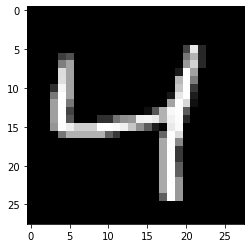

In [5]:
image = np.array(train_x[2], dtype = "float")
pixels = image.reshape((28,28))
plt.imshow(pixels, cmap = "gray")
plt.show()

In [6]:
train_x = train_x.astype("float32") / 255
test_x = test_x.astype("float32") / 255

train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

print("train_x shape:",train_x.shape)
print("test_x shape:",test_x.shape)

train_x shape: (60000, 28, 28, 1)
test_x shape: (10000, 28, 28, 1)


In [7]:
train_y[5]

2

In [8]:
train_y = keras.utils.to_categorical(train_y,num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

In [9]:
train_y[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(32,kernel_size =(3,3),activation = "relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size =(3,3),activation = "relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = "softmax")
        
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
batch_size = 128
epochs = 5
model.compile(loss = "categorical_crossentropy",optimizer = "adam", metrics=["accuracy"])
model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, validation_split= 0.1)

Epoch 1/5
422/422 [==============================] - 47s 110ms/step - loss: 0.3638 - accuracy: 0.8910 - val_loss: 0.0871 - val_accuracy: 0.9775
Epoch 2/5
422/422 [==============================] - 38s 90ms/step - loss: 0.1111 - accuracy: 0.9663 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 3/5
422/422 [==============================] - 39s 93ms/step - loss: 0.0838 - accuracy: 0.9737 - val_loss: 0.0504 - val_accuracy: 0.9872
Epoch 4/5
422/422 [==============================] - 38s 91ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.0427 - val_accuracy: 0.9870
Epoch 5/5
422/422 [==============================] - 39s 93ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.0397 - val_accuracy: 0.9898


1


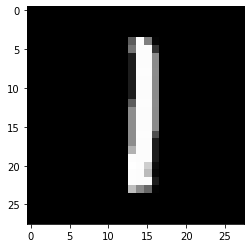

In [12]:
prediction = model.predict(train_x[678].reshape([1,28,28,1]))
print(np.argmax(prediction))

image = np.array(train_x[678], dtype = "float")
pixels = image.reshape((28,28))
plt.imshow(pixels, cmap = "gray")
plt.show()

In [13]:
def sketch_recognition(image):
    cv2.resize(image, (28,28))
    prediction = model.predict(image.reshape([1,28,28,1]))
    return np.argmax(prediction)

gr.Interface(fn=sketch_recognition, inputs="sketchpad", outputs="label").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11106.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f6cfcc8d7d0>,
 'http://127.0.0.1:7860/',
 'https://11106.gradio.app')